In [1]:
import numpy as np
import os
from PIL import Image
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
NEEDLE = "./needle2.png"
GAUGE = "./gauge_obj_detect.jpg"

/var/folders/cz/jkx36w9s3kddybx53x61dqv00000gn/T/ipykernel_50351/3435276557.py:2: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  image_rot_90 = image.rotate(319, expand=False, resample=Image.BICUBIC)


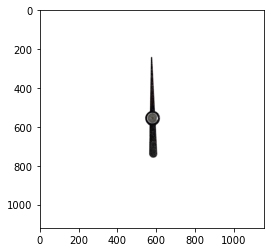

In [3]:
image = Image.open(NEEDLE).convert('RGBA')
image_rot_90 = image.rotate(319, expand=False, resample=Image.BICUBIC)
plt.imshow(image_rot_90)

/var/folders/cz/jkx36w9s3kddybx53x61dqv00000gn/T/ipykernel_50351/904617046.py:2: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  image_rot_90 = image.rotate(-90, expand=False, resample=Image.BICUBIC)


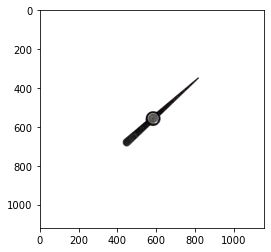

In [4]:
image = Image.open(NEEDLE).convert('RGBA')
image_rot_90 = image.rotate(-90, expand=False, resample=Image.BICUBIC)
plt.imshow(image_rot_90)

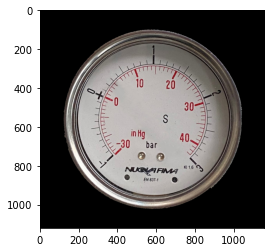

In [9]:
# Gauge background
gauge = cv.imread(GAUGE)
plt.imshow(cv.cvtColor(gauge, cv.COLOR_BGR2RGB))
plt.show() 

In [23]:
def avg_circles(circles, b):
    avg_x=0
    avg_y=0
    avg_r=0
    for i in range(b):
        #optional - average for multiple circles (can happen when a gauge is at a slight angle)
        avg_x = avg_x + circles[0][i][0]
        avg_y = avg_y + circles[0][i][1]
        avg_r = avg_r + circles[0][i][2]
    avg_x = int(avg_x/(b))
    avg_y = int(avg_y/(b))
    avg_r = int(avg_r/(b))
    return avg_x, avg_y, avg_r

def positioning_degree(x,y,r,img):
  separation= 10 #in degrees
  interval = int(360/separation)
  p1 = np.zeros((interval,2))  #set empty arrays
  p2 = np.zeros((interval,2))
  p_text = np.zeros((interval,2))    

  for i in range(0,interval):
      for j in range(0,2):
          if (j%2==0):
              p1[i][j] = x + 0.9 * r * np.cos(separation * i * np.pi / 180) #point for lines
          else:
              p1[i][j] = y + 0.9 * r * np.sin(separation * i * np.pi / 180)

  text_offset_x = 10
  text_offset_y = 5

  for i in range(0, interval):
      for j in range(0, 2):
          if (j % 2 == 0):
              p2[i][j] = x + r * np.cos(separation * i * np.pi / 180)
              p_text[i][j] = x - text_offset_x + 1.2 * r * np.cos((separation) * (i+9) * np.pi / 180) #point for text labels, i+9 rotates the labels by 90 degrees
          else:
              p2[i][j] = y + r * np.sin(separation * i * np.pi/ 180)
              p_text[i][j] = y + text_offset_y + 1.2* r * np.sin((separation) * (i+9) * np.pi / 180)  # point for text labels, i+9 rotates the labels by 90 degrees

  #add the lines and labels to the image
  for i in range(0,interval):
      cv.line(img, (int(p1[i][0]), int(p1[i][1])), (int(p2[i][0]), int(p2[i][1])),(0, 255, 0), 2)
      cv.putText(img, '%s' %(int(i*separation)), (int(p_text[i][0]), int(p_text[i][1])), cv.FONT_HERSHEY_SIMPLEX, 1.,(255,255,255),1,cv.LINE_AA)

  plt.figure(figsize=(10, 7))
  plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  plt.title("Positioning degree")
  plt.show() 

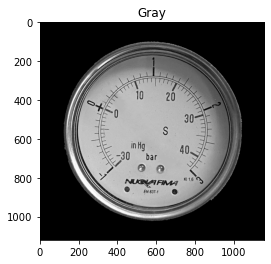

In [11]:
gray = cv.cvtColor(gauge, cv.COLOR_BGR2GRAY)
plt.imshow(gray, cmap="gray")
plt.title("Gray")
plt.show() 

In [12]:
width, height = gray.shape[:2]
circle_img= cv.HoughCircles(gray, cv.HOUGH_GRADIENT,1, 20, np.array([]), 100, 50, int(height*0.35), int(height*0.50))
a, b, c = circle_img.shape
circle_img

array([[[583.5, 565.5, 408.7],
        [565.5, 551.5, 409.4],
        [560.5, 582.5, 418.4],
        [591.5, 544.5, 415.8],
        [595.5, 584.5, 418.7],
        [613.5, 546.5, 420.1],
        [575.5, 531.5, 431.3],
        [612.5, 569.5, 423.2],
        [545.5, 559.5, 424. ],
        [578.5, 595.5, 425.5],
        [549.5, 538.5, 429.8],
        [601.5, 524.5, 428.1],
        [627.5, 529.5, 440.8],
        [633.5, 561.5, 438.5],
        [540.5, 581.5, 434.1],
        [629.5, 585.5, 443.1],
        [551.5, 600.5, 438.5],
        [583.5, 512.5, 444.6],
        [557.5, 518.5, 412.2],
        [612.5, 608.5, 448. ],
        [652.5, 552.5, 454.4],
        [524.5, 563.5, 446.4],
        [645.5, 520.5, 460.7],
        [647.5, 576.5, 459.5],
        [591.5, 612.5, 446.4],
        [603.5, 504.5, 447.6],
        [629.5, 505.5, 459.1],
        [620.5, 628.5, 469.2],
        [567.5, 612.5, 443.7],
        [522.5, 599.5, 458.6],
        [668.5, 564.5, 473.8],
        [589.5, 632.5, 465.9],
        

In [13]:
a, b, c = circle_img.shape
a, b, c

(1, 166, 3)

In [14]:
gauge3 = gauge.copy()
gauge4 = gauge.copy()
gauge5 = gauge.copy()

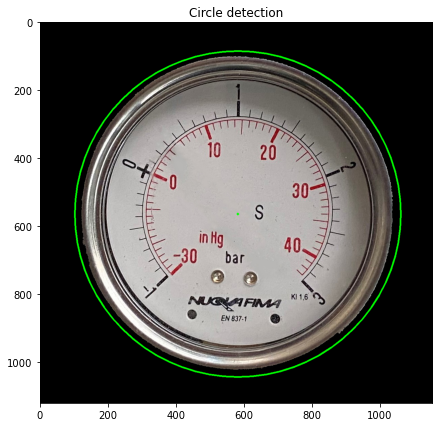

In [17]:
#Averaging out nearby circles incase 
x,y,r = avg_circles(circle_img, b)
cv.circle(gauge3, (x,y), r, (0,255,0), 3)
cv.circle(gauge3, (x,y), 2, (0,255,0), 3)

plt.figure(figsize=(10,7))
plt.imshow(cv.cvtColor(gauge3, cv.COLOR_BGR2RGB))
plt.title("Circle detection")
plt.show() 

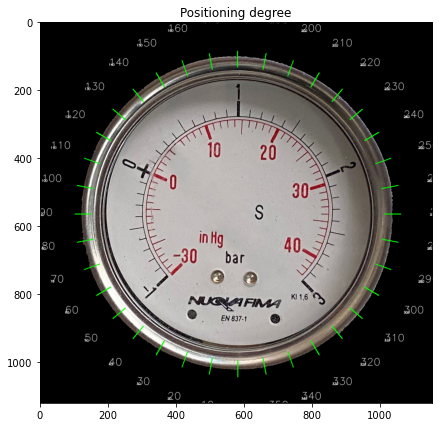

In [24]:
positioning_degree(x,y,r,gauge4)

In [25]:
angle_min =50
angle_max = 317
value_min = -1
value_max = 3
value_increment = 0.1 # value between each scale

angle_range = angle_max - angle_min
value_range = value_max - value_min

angle_increment = (angle_range * value_increment)/value_range
angle_increment

6.675000000000001

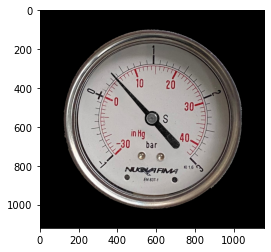

In [26]:
img_gauge = Image.open(GAUGE, 'r')
img_needle = Image.open(NEEDLE).convert('RGBA')
img_copy = img_gauge.copy()

img_copy.paste(img_needle.convert('L'), (0, 0), img_needle.convert('RGBA'))


plt.imshow(img_copy)

In [27]:
def getAngleIncrement(angle_min, angle_max, value_min, value_max, value_increment):
  angle_range = angle_max - angle_min
  value_range = value_max - value_min

  angle_increment = (angle_range * value_increment)/value_range
  return angle_increment

In [28]:
ANGLE_MIN = 50
ANGLE_MAX = 317
VALUE_MIN = -1
VALUE_MAX = 3
VALUE_INCREMENT = 0.1 # value between each scale
getAngleIncrement(angle_min=ANGLE_MIN,
                  angle_max=ANGLE_MAX,
                  value_min=VALUE_MIN,
                  value_max=VALUE_MAX,
                  value_increment=VALUE_INCREMENT)

6.675000000000001

In [29]:
def getDegreeMapping(min_value, max_value, value_increment, angle_start, angle_min, angle_max):
  # Get angle increment
  angle_range = angle_max - angle_min
  value_range = value_max - value_min

  angle_increment = (angle_range * value_increment)/value_range
  angle_increment = float("{:.2f}".format(angle_increment))
  degree_mapping = {min_value:angle_start}
  # angle_start = 270
  for i in np.arange(min_value+value_increment,max_value+value_increment,value_increment):
    gauge_scale = float("{:.2f}".format(i))
    angle_start += angle_increment
    degree_mapping[gauge_scale] = angle_start
  return degree_mapping

In [30]:
getDegreeMapping(min_value=-1.0,
                 max_value=3.0,
                 value_increment=0.1,
                 angle_start=270,
                 angle_min=50,
                 angle_max=317)

{-1.0: 270,
 -0.9: 276.68,
 -0.8: 283.36,
 -0.7: 290.04,
 -0.6: 296.72,
 -0.5: 303.40000000000003,
 -0.4: 310.08000000000004,
 -0.3: 316.76000000000005,
 -0.2: 323.44000000000005,
 -0.1: 330.12000000000006,
 -0.0: 336.80000000000007,
 0.1: 343.4800000000001,
 0.2: 350.1600000000001,
 0.3: 356.8400000000001,
 0.4: 363.5200000000001,
 0.5: 370.2000000000001,
 0.6: 376.8800000000001,
 0.7: 383.5600000000001,
 0.8: 390.2400000000001,
 0.9: 396.92000000000013,
 1.0: 403.60000000000014,
 1.1: 410.28000000000014,
 1.2: 416.96000000000015,
 1.3: 423.64000000000016,
 1.4: 430.32000000000016,
 1.5: 437.00000000000017,
 1.6: 443.6800000000002,
 1.7: 450.3600000000002,
 1.8: 457.0400000000002,
 1.9: 463.7200000000002,
 2.0: 470.4000000000002,
 2.1: 477.0800000000002,
 2.2: 483.7600000000002,
 2.3: 490.4400000000002,
 2.4: 497.12000000000023,
 2.5: 503.80000000000024,
 2.6: 510.48000000000025,
 2.7: 517.1600000000002,
 2.8: 523.8400000000001,
 2.9: 530.5200000000001,
 3.0: 537.2}

In [46]:
angleList = list(getDegreeMapping(min_value=-1,
                 max_value=3,
                 value_increment=0.1,
                 angle_start=270,
                 angle_min=50,
                 angle_max=317).values())

angleList

[270,
 276.68,
 283.36,
 290.04,
 296.72,
 303.40000000000003,
 310.08000000000004,
 316.76000000000005,
 323.44000000000005,
 330.12000000000006,
 336.80000000000007,
 343.4800000000001,
 350.1600000000001,
 356.8400000000001,
 363.5200000000001,
 370.2000000000001,
 376.8800000000001,
 383.5600000000001,
 390.2400000000001,
 396.92000000000013,
 403.60000000000014,
 410.28000000000014,
 416.96000000000015,
 423.64000000000016,
 430.32000000000016,
 437.00000000000017,
 443.6800000000002,
 450.3600000000002,
 457.0400000000002,
 463.7200000000002,
 470.4000000000002,
 477.0800000000002,
 483.7600000000002,
 490.4400000000002,
 497.12000000000023,
 503.80000000000024,
 510.48000000000025,
 517.1600000000002,
 523.8400000000001,
 530.5200000000001,
 537.2]

In [47]:
# os.mkdir("needles")
# os.mkdir("tf_gauges")
# os.mkdir("gauges")

In [50]:
PATH = "./needles/needle_rot_{0}.png"
for angle in angleList:
  angle = float("{:.2f}".format(angle))
  print(PATH.format(angle))

./needles/needle_rot_270.0.png
./needles/needle_rot_276.68.png
./needles/needle_rot_283.36.png
./needles/needle_rot_290.04.png
./needles/needle_rot_296.72.png
./needles/needle_rot_303.4.png
./needles/needle_rot_310.08.png
./needles/needle_rot_316.76.png
./needles/needle_rot_323.44.png
./needles/needle_rot_330.12.png
./needles/needle_rot_336.8.png
./needles/needle_rot_343.48.png
./needles/needle_rot_350.16.png
./needles/needle_rot_356.84.png
./needles/needle_rot_363.52.png
./needles/needle_rot_370.2.png
./needles/needle_rot_376.88.png
./needles/needle_rot_383.56.png
./needles/needle_rot_390.24.png
./needles/needle_rot_396.92.png
./needles/needle_rot_403.6.png
./needles/needle_rot_410.28.png
./needles/needle_rot_416.96.png
./needles/needle_rot_423.64.png
./needles/needle_rot_430.32.png
./needles/needle_rot_437.0.png
./needles/needle_rot_443.68.png
./needles/needle_rot_450.36.png
./needles/needle_rot_457.04.png
./needles/needle_rot_463.72.png
./needles/needle_rot_470.4.png
./needles/needl

In [51]:
PATH = "./needles/needle_rot_{0}.png"
def make_needles(angle):
  img = Image.open(NEEDLE).convert('RGBA')
  x = img.rotate(-angle, expand=False, resample=Image.BICUBIC)
  
  filename = PATH.format(angle)
  
  x.save(filename)

for angle in angleList:
  angle = float("{:.2f}".format(angle))
  make_needles(angle)

/var/folders/cz/jkx36w9s3kddybx53x61dqv00000gn/T/ipykernel_50351/1952319390.py:4: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  x = img.rotate(-angle, expand=False, resample=Image.BICUBIC)


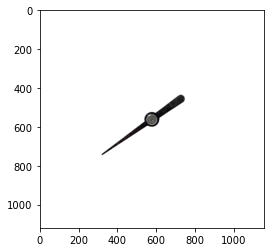

In [53]:
needle1 = Image.open("./needles/needle_rot_276.68.png")
plt.imshow(needle1)

In [3]:
# # Folder for storing rotated needle
# os.mkdir("./work/gauge_reader_model/value_reading/needles")

# # for training the model
# os.mkdir("./work/gauge_reader_model/value_reading/tf_gauges")

# # for EDA
# os.mkdir("./work/gauge_reader_model/value_reading/gauges")

In [55]:
# Create the folders for each of the gauge classes
PATH = './tf_gauges/psi_{0}'

def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)

m = range(-1, 3)
n = range(1, 10)
  
for i in np.arange(-1, 3+0.1, 0.1):
  negative_num = float("{:.1f}".format(i))
  createFolder(PATH.format(negative_num))

In [56]:
NEEDLES_PATH = "./needles/needle_rot_{0}.png"
TF_GAUGES = "./tf_gauges/psi_{0}"
EDA_GAUGES = "./gauges/{0}"

def save_gauge(item, num):
    img_gauge = Image.open(GAUGE, 'r')
    item = float("{:.2f}".format(item))

    filename = NEEDLES_PATH.format(item)
    img_needle = Image.open(filename, 'r')
    img_copy = img_gauge.copy()

    img_copy.paste(img_needle.convert('L'), (0,0), img_needle.convert('RGBA'))
    
    # Save the synthetic image to the class folder
    # string_num = str(num)
    # dash = string_num.replace(".","-")
    folder = TF_GAUGES.format(num)

    # Save PNG for data Augmentation
    gauge_name = "{0}/gauge_0.png"
    filename_save = gauge_name.format(folder)
    img_copy.save(filename_save)

    # Save PNG for EDA
    eda_name = "gauge_{0}.png".format(num)
    img_copy.save(EDA_GAUGES.format(eda_name))

def iterate_gauge(mapping):
    for idx, item in enumerate(mapping):
        
        save_gauge(mapping[item], item)

In [57]:
DegreeMap = getDegreeMapping(min_value=-1.0,
                 max_value=3.0,
                 value_increment=0.1,
                 angle_start=270,
                 angle_min=50,
                 angle_max=317)
print(DegreeMap)

{-1.0: 270, -0.9: 276.68, -0.8: 283.36, -0.7: 290.04, -0.6: 296.72, -0.5: 303.40000000000003, -0.4: 310.08000000000004, -0.3: 316.76000000000005, -0.2: 323.44000000000005, -0.1: 330.12000000000006, -0.0: 336.80000000000007, 0.1: 343.4800000000001, 0.2: 350.1600000000001, 0.3: 356.8400000000001, 0.4: 363.5200000000001, 0.5: 370.2000000000001, 0.6: 376.8800000000001, 0.7: 383.5600000000001, 0.8: 390.2400000000001, 0.9: 396.92000000000013, 1.0: 403.60000000000014, 1.1: 410.28000000000014, 1.2: 416.96000000000015, 1.3: 423.64000000000016, 1.4: 430.32000000000016, 1.5: 437.00000000000017, 1.6: 443.6800000000002, 1.7: 450.3600000000002, 1.8: 457.0400000000002, 1.9: 463.7200000000002, 2.0: 470.4000000000002, 2.1: 477.0800000000002, 2.2: 483.7600000000002, 2.3: 490.4400000000002, 2.4: 497.12000000000023, 2.5: 503.80000000000024, 2.6: 510.48000000000025, 2.7: 517.1600000000002, 2.8: 523.8400000000001, 2.9: 530.5200000000001, 3.0: 537.2}


In [58]:
iterate_gauge(DegreeMap)